In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Teams

In [2]:
home= "Hoffenheim"
away= "Mainz 05"

In [3]:
df_home= pd.read_csv(f"../Data/{home}.csv")
df_home["Date"] = pd.to_datetime(df_home["Date"]) 
df_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,PK,PKm,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
23,Hoffenheim,Bochum,2025-03-01,W,A,1,0,1,0,0,...,0.4,0.6,0.4,0.4,-0.4,0.06,0,0.7,0.22,0.7
24,Hoffenheim,Heidenheim,2025-03-09,D,H,1,1,0,0,0,...,1.3,1.2,-0.3,-0.3,-0.3,0.08,0,1.6,0.31,0.6
25,Hoffenheim,St. Pauli,2025-03-14,L,A,0,1,-1,0,0,...,0.1,0.9,-0.2,-0.2,-0.1,0.04,0,1.4,0.28,0.4
26,Hoffenheim,Augsburg,2025-03-29,D,H,1,1,0,1,0,...,0.5,1.3,-0.4,-0.7,-0.5,0.06,1,0.6,0.15,-0.4
27,Hoffenheim,RB Leipzig,2025-04-05,L,A,1,3,-2,0,0,...,0.6,0.6,0.1,0.1,0.4,0.11,0,1.4,0.37,-1.6


In [4]:
df_vs_home= pd.read_csv(f"../Data/vs {home}.csv")
df_vs_home["Date"] = pd.to_datetime(df_vs_home["Date"]) 
df_vs_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,PK,PKm,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
23,Bochum,Hoffenheim,2025-03-01,L,H,0,1,-1,0,0,...,0.6,1.9,-0.9,-0.9,-0.6,0.07,1,0.1,0.04,-0.9
24,Heidenheim,Hoffenheim,2025-03-09,D,A,1,1,0,0,0,...,1.0,1.1,-0.2,-0.2,0.0,0.05,0,0.1,0.04,-0.9
25,St. Pauli,Hoffenheim,2025-03-14,W,H,1,0,1,0,0,...,1.9,1.1,-1.0,-1.0,-0.9,0.20,1,0.0,NaN,0.0
26,Augsburg,Hoffenheim,2025-03-29,D,A,1,1,0,0,0,...,0.6,0.3,0.4,0.4,0.4,0.05,0,1.1,0.06,0.1
27,RB Leipzig,Hoffenheim,2025-04-05,W,H,3,1,2,0,0,...,1.1,1.5,1.4,1.4,0.9,0.10,1,0.7,0.14,-0.3


In [5]:
df_away= pd.read_csv(f"../Data/{away}.csv")
df_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,PK,PKm,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
23,Mainz 05,RB Leipzig,2025-03-01,W,A,2,1,1,0,0,...,1.0,1.2,0.5,0.5,0.0,0.10,0,1.6,0.52,0.6
24,Mainz 05,Gladbach,2025-03-07,W,A,3,1,2,0,0,...,1.0,1.6,1.5,1.5,1.0,0.12,0,0.9,0.23,-0.1
25,Mainz 05,Freiburg,2025-03-15,D,H,2,2,0,0,0,...,1.2,2.0,0.7,0.7,0.8,0.14,0,3.0,0.38,1.0
26,Mainz 05,Dortmund,2025-03-30,L,A,1,3,-2,0,0,...,0.6,1.2,0.2,0.2,0.4,0.07,0,3.0,0.44,0.0
27,Mainz 05,Holstein Kiel,2025-04-05,D,H,1,1,0,0,0,...,1.6,1.5,-0.8,-0.8,-0.6,0.14,1,1.3,0.26,0.3


In [6]:
df_vs_away= pd.read_csv(f"../Data/vs {away}.csv")
df_vs_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_vs_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,PK,PKm,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
23,RB Leipzig,Mainz 05,2025-03-01,L,H,1,2,-1,0,0,...,0.8,1.4,-0.4,-0.4,-0.8,0.11,0,1.7,0.56,-0.3
24,Gladbach,Mainz 05,2025-03-07,L,H,1,3,-2,0,0,...,1.0,0.7,-0.4,-0.4,-1.0,0.11,0,2.2,0.36,-0.8
25,Freiburg,Mainz 05,2025-03-15,D,A,2,2,0,0,0,...,2.6,2.7,-1.1,-1.1,-0.6,0.14,1,1.8,0.51,-0.2
26,Dortmund,Mainz 05,2025-03-30,W,H,3,1,2,0,0,...,2.7,2.8,0.2,0.2,0.3,0.16,1,0.4,0.22,-0.6
27,Holstein Kiel,Mainz 05,2025-04-05,D,A,1,1,0,0,0,...,0.7,1.4,0.1,0.1,0.3,0.09,0,0.9,0.30,-0.1


In [7]:
print(list(df_away.columns))

['Team', 'Opp', 'Date', 'Result', 'H/A', 'GF', 'GA', 'GD', 'PK', 'PKm', 'G-PK', 'Poss', 'PKatt', 'Att (GK)', 'Thr', 'Pa Launch%', 'Pa AvgLen', 'Won', 'Lost', 'Won%', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Last3rd Car', 'OppCr', 'Stp', 'Stp%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'GK Att', 'Launch%', 'AvgLen', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'PKcon', 'OG', 'Recov', '#OPA', 'AvgDist', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'PKdef', 'PKA', 'PKms', 'Missed PK%', 'PKAg', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassL

# Desc

# Features

## Offense

In [8]:
offense= ['G-PK', 'PK', 'PKm', 'Poss', 'PKatt', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 
          'PrgC', 'Last3rd Car', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'Sh', 'G/Sh', 
          'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 
          'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 
          'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 
          'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassLive Sc', 'PassDead Sc', 'TO Sc', 'Sh-Sh', 
          'Fld Sc', 'Def-Sc', 'Touches', 'Def Pen', 'Tch Def 3rd', 'Tch Mid 3rd', 'Tch Att 3rd', 'Att Pen', 'Live Tch', 'xG', 
          'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'FKAtt', 'GF']

In [9]:
df_home_off= df_home[offense]
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
23,1,0,0,42,0,17,6,35.3,11,64.7,...,-0.3,-0.3,0.4,0.6,0.4,0.4,-0.4,0.06,0,1
24,1,0,0,55,0,17,10,58.8,6,35.3,...,0.1,0.1,1.3,1.2,-0.3,-0.3,-0.3,0.08,0,1
25,0,0,0,56,0,9,5,55.6,3,33.3,...,-1.8,-1.8,0.1,0.9,-0.2,-0.2,-0.1,0.04,0,0
26,0,1,0,56,1,12,5,41.7,7,58.3,...,0.8,0.1,0.5,1.3,-0.4,-0.7,-0.5,0.06,1,1
27,1,0,0,34,0,14,6,42.9,7,50.0,...,-0.7,-0.7,0.6,0.6,0.1,0.1,0.4,0.11,0,1


In [10]:
df_vs_home_off= df_vs_home[offense]
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
23,0,0,0,58,0,8,5,62.5,3,37.5,...,0.3,0.3,0.6,1.9,-0.9,-0.9,-0.6,0.07,1,0
24,1,0,0,45,0,12,8,66.7,3,25.0,...,-0.1,-0.1,1.0,1.1,-0.2,-0.2,0.0,0.05,0,1
25,1,0,0,44,0,9,3,33.3,4,44.4,...,1.8,1.8,1.9,1.1,-1.0,-1.0,-0.9,0.20,1,1
26,1,0,0,44,0,16,4,25.0,10,62.5,...,-0.8,-0.1,0.6,0.3,0.4,0.4,0.4,0.05,0,1
27,3,0,0,66,0,6,3,50.0,1,16.7,...,0.7,0.7,1.1,1.5,1.4,1.4,0.9,0.10,1,3


In [11]:
df_away_off= df_away[offense]
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
23,2,0,0,51,0,11,6,54.5,5,45.5,...,0.1,0.1,1.0,1.2,0.5,0.5,0.0,0.10,0,2
24,3,0,0,43,0,17,9,52.9,8,47.1,...,0.1,0.1,1.0,1.6,1.5,1.5,1.0,0.12,0,3
25,2,0,0,44,0,5,3,60.0,2,40.0,...,-1.8,-1.8,1.2,2.0,0.7,0.7,0.8,0.14,0,2
26,1,0,0,56,0,26,9,34.6,16,61.5,...,-2.0,-2.0,0.6,1.2,0.2,0.2,0.4,0.07,0,1
27,1,0,0,58,0,20,6,30.0,14,70.0,...,0.9,0.9,1.6,1.5,-0.8,-0.8,-0.6,0.14,1,1


In [12]:
df_vs_away_off= df_vs_away[offense]
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
23,1,0,0,49,0,19,6,31.6,11,57.9,...,-0.1,-0.1,0.8,1.4,-0.4,-0.4,-0.8,0.11,0,1
24,1,0,0,57,0,15,8,53.3,6,40.0,...,-0.1,-0.1,1.0,0.7,-0.4,-0.4,-1.0,0.11,0,1
25,2,0,0,56,0,10,7,70.0,2,20.0,...,1.8,1.8,2.6,2.7,-1.1,-1.1,-0.6,0.14,1,2
26,3,0,0,44,0,25,9,36.0,16,64.0,...,2.0,2.0,2.7,2.8,0.2,0.2,0.3,0.16,1,3
27,1,0,0,42,0,16,7,43.8,9,56.3,...,-0.9,-0.9,0.7,1.4,0.1,0.1,0.3,0.09,0,1


## Defence

In [13]:
defence= ['OppCr', 'Stp', 'Stp%', 'PKcon', '#OPA', 'AvgDist', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'SoTA', 'Saves', 
          'Save%', 'Tkl', 'TklW', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Tkl.2', 'Tkl Att', 'Tkl%', 'Lost Tkl', 
          'Ints', 'BlcSh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',  'PSxG', 'PSxG/SoT', 'PSxG+/-', 'GA']

In [14]:
df_home_def= df_home[defence]
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
23,24,1,4.2,0,2,15.7,0,NaN,0,0,...,4,13,7,19,61,0,0.7,0.22,0.7,0
24,12,0,0.0,0,0,8.8,0,NaN,0,0,...,5,11,6,13,28,1,1.6,0.31,0.6,1
25,16,1,6.3,0,0,9.3,0,NaN,0,0,...,3,4,8,28,39,1,1.4,0.28,0.4,1
26,13,2,15.4,0,2,16.7,0,NaN,0,0,...,6,12,5,19,38,0,0.6,0.15,-0.4,1
27,21,2,9.5,0,2,12.6,0,NaN,0,1,...,4,10,7,17,27,2,1.4,0.37,-1.6,3


In [15]:
df_vs_home_def= df_vs_home[defence]
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
23,12,0,0.0,0,0,2.0,0,NaN,0,0,...,4,8,7,26,42,1,0.1,0.04,-0.9,1
24,22,0,0.0,0,0,17.0,0,NaN,0,0,...,5,12,5,22,48,0,0.1,0.04,-0.9,1
25,16,1,6.3,0,0,9.3,0,NaN,0,0,...,2,9,10,16,43,1,0.0,NaN,0.0,0
26,30,0,0.0,1,1,12.5,0,0.0,0,0,...,3,8,12,25,46,0,1.1,0.06,0.1,1
27,10,0,0.0,0,1,16.7,0,NaN,0,0,...,1,5,6,20,20,2,0.7,0.14,-0.3,1


In [16]:
df_away_def= df_away[defence]
df_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,21,2,9.5,0,3,14.2,0,NaN,0,0,...,2,5,7,23,38,0,0.9,0.19,-0.1,1
1,30,2,6.7,0,0,7.9,0,NaN,1,0,...,8,6,7,22,36,2,2.8,0.26,-0.2,3
2,13,1,7.7,1,7,26.4,0,0.0,0,0,...,4,7,13,32,16,1,1.6,0.28,-0.4,2
3,41,3,7.3,0,2,11.4,0,NaN,0,0,...,10,10,4,13,54,0,2.6,0.38,0.6,2
4,19,2,10.5,0,2,13.0,0,NaN,0,1,...,2,6,12,28,26,0,1.7,0.31,-0.3,2


In [17]:
df_vs_away_def= df_vs_away[defence]
df_vs_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,15,1,6.7,0,0,7.3,0,NaN,1,0,...,3,9,5,18,15,0,0.8,0.28,-0.2,1
1,11,0,0.0,1,2,21.0,0,0.0,0,0,...,3,5,7,21,19,0,2.5,0.25,-0.5,3
2,27,2,7.4,0,0,6.8,0,NaN,0,0,...,5,8,12,24,49,1,1.1,0.22,0.1,1
3,4,0,0.0,0,2,19.7,0,NaN,0,0,...,0,8,8,17,7,0,1.8,0.60,-1.2,3
4,21,1,4.8,0,0,5.5,0,NaN,0,0,...,3,6,8,29,29,0,0.3,0.27,0.3,0


## Combined

In [18]:
combined= ['Won', 'Lost', 'Won%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Recov']

In [19]:
df_home_cmb= df_home[combined]
df_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
23,29,34,46.0,1,0,0,17,16,32
24,34,19,64.2,2,0,0,9,9,45
25,22,19,53.7,1,0,0,8,6,40
26,14,13,51.9,1,0,0,14,10,53
27,5,13,27.8,3,1,0,12,8,38


In [20]:
df_vs_home_cmb= df_vs_home[combined]
df_vs_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
23,34,29,54.0,0,0,0,16,17,41
24,19,34,35.8,3,0,0,11,7,42
25,19,22,46.3,0,0,0,6,8,44
26,13,14,48.1,2,0,0,12,13,37
27,13,5,72.2,0,0,0,10,11,45


In [21]:
df_away_cmb= df_away[combined]
df_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
23,25,22,53.2,1,0,0,15,7,68
24,14,26,35.0,1,0,0,6,5,48
25,17,31,35.4,1,1,0,7,6,35
26,17,21,44.7,0,0,0,8,10,52
27,26,16,61.9,3,0,0,12,8,49


In [22]:
df_vs_away_cmb= df_vs_away[combined]
df_vs_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
23,22,25,46.8,1,0,0,8,15,54
24,26,14,65.0,0,0,0,6,6,45
25,31,17,64.6,2,0,0,7,7,40
26,21,17,55.3,2,0,0,10,8,52
27,16,26,38.1,4,0,0,8,11,38


## By Team

In [23]:
def create_lagged_features(df, target_cols, window= 4):
    """
    Creates lagged and rolling window features for a given dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing game-by-game data.
    team_col (str): The column name representing the team.
    date_col (str): The column name representing the game date.
    target_cols (list): List of columns to create lagged and rolling features for.
    opponent_col (str, optional): Column representing the opponent team (if applicable).
    lags (list): List of lag periods to include.
    rolling_windows (list): List of rolling window sizes for moving averages and std dev.
    
    Returns:
    pd.DataFrame: Dataframe with additional lagged and rolling features.
    """
    df = df.copy()
    
    
    # Create lagged features for the given columns
    #for col in target_cols:
     #   for lag in range(1, window+1):
      #      df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling window features (mean & std)
    for col in target_cols:
        df[f'{col}_rolling_avg_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).mean()
        df[f'{col}_rolling_std_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).std()
    
    # Fill NA values (after shifting to avoid data leakage)
    df = df.fillna(0)
    
    return df


In [24]:
df_home_off= create_lagged_features(df_home_off, offense)
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
23,1,0,0,42,0,17,6,35.3,11,64.7,...,-0.100,1.230176,-0.150,1.287116,0.1075,0.035000,0.50,0.57735,1.25,1.258306
24,1,0,0,55,0,17,10,58.8,6,35.3,...,0.225,1.114675,0.075,1.081280,0.0850,0.026458,0.25,0.50000,1.25,1.258306
25,0,0,0,56,0,9,5,55.6,3,33.3,...,0.425,0.834166,0.225,0.932291,0.0875,0.025000,0.00,0.00000,1.50,1.000000
26,0,1,0,56,1,12,5,41.7,7,58.3,...,-0.025,0.309570,-0.200,0.182574,0.0750,0.034157,0.00,0.00000,0.75,0.500000
27,1,0,0,34,0,14,6,42.9,7,50.0,...,-0.200,0.454606,-0.325,0.170783,0.0600,0.016330,0.25,0.50000,0.75,0.500000


In [25]:
df_vs_home_off= create_lagged_features(df_vs_home_off, offense)
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
23,0,0,0,58,0,8,5,62.5,3,37.5,...,0.150,1.452584,-0.200,0.938083,0.1325,0.037749,0.25,0.50000,2.25,1.500000
24,1,0,0,45,0,12,8,66.7,3,25.0,...,-0.475,1.120640,-0.550,0.660808,0.1100,0.042426,0.50,0.57735,1.50,1.732051
25,1,0,0,44,0,9,3,33.3,4,44.4,...,-0.825,0.427200,-0.650,0.472582,0.0900,0.048305,0.50,0.57735,0.75,0.500000
26,1,0,0,44,0,16,4,25.0,10,62.5,...,-0.800,0.408248,-0.625,0.450000,0.1200,0.071647,0.50,0.57735,0.75,0.500000
27,3,0,0,66,0,6,3,50.0,1,16.7,...,-0.425,0.655108,-0.275,0.585235,0.0925,0.072284,0.50,0.57735,0.75,0.500000


In [26]:
df_away_def= create_lagged_features(df_away_def, defence)
df_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
23,15,1,6.7,0,0,9.8,0,0.0,0,0,...,0.50,0.577350,0.825,0.895824,0.273333,0.023094,0.575,0.450000,0.25,0.500000
24,18,3,16.7,0,0,6.0,0,0.0,0,0,...,0.75,0.500000,0.700,0.663325,0.360000,0.140000,0.450,0.300000,0.25,0.500000
25,31,1,3.2,0,0,8.0,0,0.0,0,0,...,1.00,0.816497,0.775,0.665207,0.336667,0.159478,0.275,0.377492,0.50,0.577350
26,13,0,0.0,0,4,16.6,0,0.0,0,2,...,1.00,0.816497,1.375,1.265899,0.376667,0.145029,0.375,0.518813,1.00,0.816497
27,11,1,9.1,0,1,17.4,0,0.0,0,0,...,1.00,0.816497,2.125,1.050000,0.392500,0.122577,0.375,0.518813,1.75,0.957427


In [27]:
df_vs_away_def= create_lagged_features(df_vs_away_def, defence)
df_vs_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
23,11,0,0.0,0,5,29.7,0,0.0,0,0,...,1.25,0.957427,1.525,0.842120,0.3500,0.108628,0.525,1.021029,1.00,1.154701
24,10,1,10.0,0,0,9.8,0,0.0,0,0,...,0.75,0.957427,1.825,0.499166,0.4225,0.131751,0.325,1.102648,1.50,1.000000
25,9,3,33.3,0,0,10.0,0,0.0,0,0,...,0.25,0.500000,1.925,0.531507,0.4225,0.131751,-0.325,0.590903,2.25,0.500000
26,17,2,11.8,0,2,12.7,0,0.0,0,0,...,0.50,0.577350,1.750,0.369685,0.4250,0.133791,-0.500,0.294392,2.25,0.500000
27,18,0,0.0,0,0,6.3,0,0.0,0,0,...,0.25,0.500000,1.525,0.780491,0.4125,0.153921,-0.475,0.275379,2.00,0.816497


In [28]:
df_away_off= create_lagged_features(df_away_off, offense)
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
23,2,0,0,51,0,11,6,54.5,5,45.5,...,-0.425,1.007886,-0.375,0.492443,0.1825,0.109049,0.25,0.5,1.00,1.154701
24,3,0,0,43,0,17,9,52.9,8,47.1,...,0.000,0.927362,-0.175,0.419325,0.1825,0.109049,0.00,0.0,1.50,1.000000
25,2,0,0,44,0,5,3,60.0,2,40.0,...,0.700,0.627163,0.275,0.485627,0.1700,0.113725,0.00,0.0,2.25,0.500000
26,1,0,0,56,0,26,9,34.6,16,61.5,...,0.875,0.434933,0.475,0.499166,0.1200,0.016330,0.00,0.0,2.25,0.500000
27,1,0,0,58,0,20,6,30.0,14,70.0,...,0.725,0.556028,0.550,0.443471,0.1075,0.029861,0.00,0.0,2.00,0.816497


In [29]:
df_vs_away_off= create_lagged_features(df_vs_away_off, offense)
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
23,1,0,0,49,0,19,6,31.6,11,57.9,...,-0.600,0.216025,-0.675,0.386221,0.0825,0.059652,0.25,0.50000,0.25,0.500000
24,1,0,0,57,0,15,8,53.3,6,40.0,...,-0.525,0.221736,-0.575,0.221736,0.0675,0.030957,0.25,0.50000,0.25,0.500000
25,2,0,0,56,0,10,7,70.0,2,20.0,...,-0.550,0.191485,-0.750,0.208167,0.0850,0.030000,0.25,0.50000,0.50,0.577350
26,3,0,0,44,0,25,9,36.0,16,64.0,...,-0.675,0.340343,-0.775,0.170783,0.1075,0.028723,0.50,0.57735,1.00,0.816497
27,1,0,0,42,0,16,7,43.8,9,56.3,...,-0.425,0.531507,-0.525,0.573730,0.1300,0.024495,0.50,0.57735,1.75,0.957427


In [30]:
df_home_def= create_lagged_features(df_home_def, defence)
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
23,24,1,4.2,0,2,15.7,0,0.0,0,0,...,0.75,1.50000,1.725,0.754431,0.3525,0.065000,-0.275,1.304799,2.25,1.500000
24,12,0,0.0,0,0,8.8,0,0.0,0,0,...,0.75,1.50000,1.375,0.842120,0.2975,0.059090,0.125,1.294540,1.50,1.732051
25,16,1,6.3,0,0,9.3,0,0.0,0,0,...,0.25,0.50000,1.225,0.684957,0.2850,0.045092,0.725,0.189297,0.75,0.500000
26,13,2,15.4,0,2,16.7,0,0.0,0,0,...,0.50,0.57735,1.425,0.543906,0.2750,0.038730,0.675,0.250000,0.75,0.500000
27,21,2,9.5,0,2,12.6,0,0.0,0,1,...,0.50,0.57735,1.075,0.499166,0.2400,0.070711,0.325,0.499166,0.75,0.500000


In [31]:
df_vs_home_def= create_lagged_features(df_vs_home_def, defence)
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
23,12,0,0.0,0,0,2.0,0,0.0,0,0,...,0.25,0.50000,1.425,0.689807,0.345000,0.226642,0.175,0.899537,1.25,1.258306
24,22,0,0.0,0,0,17.0,0,0.0,0,0,...,0.50,0.57735,0.950,0.806226,0.282500,0.275968,-0.300,0.816497,1.25,1.258306
25,16,1,6.3,0,0,9.3,0,0.0,0,0,...,0.50,0.57735,0.850,0.900000,0.262500,0.293981,-0.650,0.640312,1.50,1.000000
26,30,0,0.0,1,1,12.5,0,0.0,0,0,...,0.75,0.50000,0.375,0.618466,0.246667,0.357957,-0.375,0.618466,0.75,0.500000
27,10,0,0.0,0,1,16.7,0,0.0,0,0,...,0.50,0.57735,0.325,0.518813,0.046667,0.011547,-0.425,0.550000,0.75,0.500000


In [32]:
df_home_cmb.rename(columns= {col: f"h_{col}" for col in df_home_cmb.columns}, inplace= True)
df_home_cmb= create_lagged_features(df_home_cmb, df_home_cmb.columns)
df_home_cmb.tail()

,h_Won,h_Lost,h_Won%,h_CrdY,h_CrdR,h_2CrdY,h_Fls,h_Fld,h_Recov,h_Won_rolling_avg_4,...,h_CrdR_rolling_avg_4,h_CrdR_rolling_std_4,h_2CrdY_rolling_avg_4,h_2CrdY_rolling_std_4,h_Fls_rolling_avg_4,h_Fls_rolling_std_4,h_Fld_rolling_avg_4,h_Fld_rolling_std_4,h_Recov_rolling_avg_4,h_Recov_rolling_std_4
23,29,34,46.0,1,0,0,17,16,32,14.50,...,0.0,0.0,0.0,0.0,9.0,2.160247,12.75,2.629956,47.75,5.500000
24,34,19,64.2,2,0,0,9,9,45,20.00,...,0.0,0.0,0.0,0.0,11.5,4.041452,13.50,3.109126,45.00,9.763879
25,22,19,53.7,1,0,0,8,6,40,23.25,...,0.0,0.0,0.0,0.0,11.5,4.041452,12.00,3.559026,45.50,9.678154
26,14,13,51.9,1,0,0,14,10,53,24.25,...,0.0,0.0,0.0,0.0,10.5,4.358899,10.00,4.242641,42.50,8.812869
27,5,13,27.8,3,1,0,12,8,38,24.75,...,0.0,0.0,0.0,0.0,12.0,4.242641,10.25,4.193249,42.50,8.812869


In [33]:
df_vs_home_cmb.rename(columns= {col: f"vh_{col}" for col in df_vs_home_cmb.columns}, inplace= True)
df_vs_home_cmb= create_lagged_features(df_vs_home_cmb, df_vs_home_cmb.columns)
df_vs_home_cmb.tail()

,vh_Won,vh_Lost,vh_Won%,vh_CrdY,vh_CrdR,vh_2CrdY,vh_Fls,vh_Fld,vh_Recov,vh_Won_rolling_avg_4,...,vh_CrdR_rolling_avg_4,vh_CrdR_rolling_std_4,vh_2CrdY_rolling_avg_4,vh_2CrdY_rolling_std_4,vh_Fls_rolling_avg_4,vh_Fls_rolling_std_4,vh_Fld_rolling_avg_4,vh_Fld_rolling_std_4,vh_Recov_rolling_avg_4,vh_Recov_rolling_std_4
23,34,29,54.0,0,0,0,16,17,41,18.50,...,0.25,0.5,0.25,0.5,13.50,2.516611,9.00,2.160247,48.00,4.546061
24,19,34,35.8,3,0,0,11,7,42,22.75,...,0.00,0.0,0.00,0.0,14.00,2.828427,11.50,4.041452,47.75,4.991660
25,19,22,46.3,0,0,0,6,8,44,20.75,...,0.00,0.0,0.00,0.0,12.75,2.753785,11.00,4.546061,45.50,5.066228
26,13,14,48.1,2,0,0,12,13,37,20.75,...,0.00,0.0,0.00,0.0,10.75,4.112988,10.00,4.690416,44.75,4.991660
27,13,5,72.2,0,0,0,10,11,45,21.25,...,0.00,0.0,0.00,0.0,11.25,4.112988,11.25,4.645787,41.00,2.943920


In [34]:
df_away_cmb.rename(columns= {col: f"va_{col}" for col in df_away_cmb.columns}, inplace= True)
df_away_cmb= create_lagged_features(df_away_cmb, df_away_cmb.columns)
df_away_cmb.tail()

,va_Won,va_Lost,va_Won%,va_CrdY,va_CrdR,va_2CrdY,va_Fls,va_Fld,va_Recov,va_Won_rolling_avg_4,...,va_CrdR_rolling_avg_4,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4
23,25,22,53.2,1,0,0,15,7,68,20.75,...,0.00,0.0,0.0,0.0,12.50,2.886751,10.00,2.000000,46.75,8.655441
24,14,26,35.0,1,0,0,6,5,48,22.50,...,0.00,0.0,0.0,0.0,13.00,3.162278,8.50,1.000000,50.00,13.735599
25,17,31,35.4,1,1,0,7,6,35,21.00,...,0.00,0.0,0.0,0.0,11.50,4.795832,7.50,1.914854,50.50,13.576941
26,17,21,44.7,0,0,0,8,10,52,19.75,...,0.25,0.5,0.0,0.0,9.25,4.031129,6.75,1.707825,46.50,15.588457
27,26,16,61.9,3,0,0,12,8,49,18.25,...,0.25,0.5,0.0,0.0,9.00,4.082483,7.00,2.160247,50.75,13.598407


In [35]:
df_vs_away_cmb.rename(columns= {col: f"a_{col}" for col in df_vs_away_cmb.columns}, inplace= True)
df_vs_away_cmb= create_lagged_features(df_vs_away_cmb, df_vs_away_cmb.columns)
df_vs_away_cmb.tail()

,a_Won,a_Lost,a_Won%,a_CrdY,a_CrdR,a_2CrdY,a_Fls,a_Fld,a_Recov,a_Won_rolling_avg_4,...,a_CrdR_rolling_avg_4,a_CrdR_rolling_std_4,a_2CrdY_rolling_avg_4,a_2CrdY_rolling_std_4,a_Fls_rolling_avg_4,a_Fls_rolling_std_4,a_Fld_rolling_avg_4,a_Fld_rolling_std_4,a_Recov_rolling_avg_4,a_Recov_rolling_std_4
23,22,25,46.8,1,0,0,8,15,54,23.75,...,0.5,1.0,0.5,1.0,10.50,2.380476,12.25,2.872281,47.25,6.184658
24,26,14,65.0,0,0,0,6,6,45,22.75,...,0.0,0.0,0.0,0.0,9.00,0.816497,13.00,3.162278,49.25,6.898067
25,31,17,64.6,2,0,0,7,7,40,22.00,...,0.0,0.0,0.0,0.0,8.25,1.707825,11.50,4.795832,47.50,6.855655
26,21,17,55.3,2,0,0,10,8,52,25.50,...,0.0,0.0,0.0,0.0,7.75,1.707825,9.25,4.031129,44.50,6.855655
27,16,26,38.1,4,0,0,8,11,38,25.00,...,0.0,0.0,0.0,0.0,7.75,1.707825,9.00,4.082483,47.75,6.448514


In [36]:
df_home_off.drop(columns=['GF'], inplace= True)
df_away_off.drop(columns=['GF'], inplace= True)
df_vs_home_off.drop(columns=['GF'], inplace= True)
df_vs_away_off.drop(columns=['GF'], inplace= True)

df_home_def.drop(columns=['GA'], inplace= True)
df_away_def.drop(columns=['GA'], inplace= True)
df_vs_home_def.drop(columns=['GA'], inplace= True)
df_vs_away_def.drop(columns=['GA'], inplace= True)

## Final DFs

In [37]:
df_home_frw= pd.concat([df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True), 
                        df_away_def[-1:].reset_index(drop=True),
                        ], 
                        axis= 1
                        )
#df_home_frw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_frw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_frw["H/A"]= "H"
df_home_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4,H/A
0,1,0,0,34,0,14,6,42.9,7,50.0,...,0.816497,2.125,1.05,0.3925,0.122577,0.375,0.518813,1.75,0.957427,H


In [38]:
df_home_gf= pd.concat([df_home_off[:-1], 
                       df_vs_home_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_home[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1
                       )
df_home_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,1,0,54,1,13,8,61.5,5,38.5,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,1
1,1,0,0,50,0,17,10,58.8,7,41.2,...,0.00,0.0,10.000000,0.000000,14.000000,0.000000,29.000000,0.000000,H,1
2,1,0,0,40,0,10,2,20.0,7,70.0,...,0.00,0.0,11.000000,1.414214,10.000000,5.656854,30.000000,1.414214,A,1
3,1,0,0,49,0,15,7,46.7,6,40.0,...,0.00,0.0,11.333333,1.154701,8.666667,4.618802,33.666667,6.429101,H,3
4,3,0,0,37,0,15,6,40.0,9,60.0,...,0.25,0.5,11.500000,1.000000,8.250000,3.862210,29.500000,9.848858,A,1


In [39]:
df_home_bcw= pd.concat([df_home_def[-1:].reset_index(drop=True), 
                        df_away_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_home_bcw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_bcw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_bcw["H/A"]= "H"
df_home_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,21,2,9.5,0,2,12.6,0,0.0,0,1,...,0.5,0.0,0.0,9.0,4.082483,7.0,2.160247,50.75,13.598407,H


In [40]:
df_home_ga= pd.concat([df_home_def[:-1], 
                       df_vs_home_off[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_home[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_home_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,19,0,0.0,0,2,12.7,0,0.0,0,0,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,3
1,12,1,8.3,0,0,12.3,0,0.0,0,0,...,0.00,0.0,10.000000,0.000000,14.000000,0.000000,29.000000,0.000000,H,4
2,18,0,0.0,1,2,19.5,0,0.0,0,0,...,0.00,0.0,11.000000,1.414214,10.000000,5.656854,30.000000,1.414214,A,2
3,9,1,11.1,0,2,20.0,0,0.0,0,1,...,0.00,0.0,11.333333,1.154701,8.666667,4.618802,33.666667,6.429101,H,4
4,18,1,5.6,0,0,12.0,0,0.0,0,2,...,0.25,0.5,11.500000,1.000000,8.250000,3.862210,29.500000,9.848858,A,1


In [41]:
df_away_frw= pd.concat([df_away_off[-1:].reset_index(drop=True), 
                        df_home_def[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_frw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_frw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_frw["H/A"]= "A"
df_away_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,1,0,0,58,0,20,6,30.0,14,70.0,...,0.5,0.0,0.0,9.0,4.082483,7.0,2.160247,50.75,13.598407,A


In [42]:
df_away_gf= pd.concat([df_away_off[:-1], 
                       df_vs_away_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_away[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,1,0,0,53,0,12,6,50.0,6,50.0,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,3
1,2,1,0,37,1,7,2,28.6,4,57.1,...,0.00,0.0,10.000000,0.000000,14.000000,0.000000,29.000000,0.000000,H,1
2,1,0,0,58,0,8,7,87.5,1,12.5,...,0.00,0.0,11.000000,1.414214,10.000000,5.656854,30.000000,1.414214,A,3
3,3,0,0,27,0,6,3,50.0,3,50.0,...,0.00,0.0,11.333333,1.154701,8.666667,4.618802,33.666667,6.429101,H,0
4,0,0,0,50,0,16,4,25.0,10,62.5,...,0.25,0.5,11.500000,1.000000,8.250000,3.862210,29.500000,9.848858,A,3


In [43]:
df_away_bcw= pd.concat([df_away_def[-1:].reset_index(drop=True), 
                        df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_bcw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_bcw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_bcw["H/A"]= "H"
df_away_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,11,1,9.1,0,1,17.4,0,0.0,0,0,...,0.5,0.0,0.0,9.0,4.082483,7.0,2.160247,50.75,13.598407,H


In [44]:
df_away_ga= pd.concat([df_away_def[:-1], 
                       df_vs_away_off[:-1],
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_away[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,21,2,9.5,0,3,14.2,0,0.0,0,0,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,3
1,30,2,6.7,0,0,7.9,0,0.0,1,0,...,0.00,0.0,10.000000,0.000000,14.000000,0.000000,29.000000,0.000000,H,2
2,13,1,7.7,1,7,26.4,0,0.0,0,0,...,0.00,0.0,11.000000,1.414214,10.000000,5.656854,30.000000,1.414214,A,2
3,41,3,7.3,0,2,11.4,0,0.0,0,0,...,0.00,0.0,11.333333,1.154701,8.666667,4.618802,33.666667,6.429101,H,2
4,19,2,10.5,0,2,13.0,0,0.0,0,1,...,0.25,0.5,11.500000,1.000000,8.250000,3.862210,29.500000,9.848858,A,0


In [45]:
df_home_gf = df_home_gf.fillna(0)

In [46]:
df_home_ga = df_home_ga.fillna(0)

In [47]:
df_away_ga = df_away_ga.fillna(0)

In [48]:
df_away_gf = df_away_gf.fillna(0)

# Categories

In [49]:
# Define bins for football goals classification
bins = [-1, 0, 1, 2, 3, float('inf')]  # -1 to include 0 as a bin
labels = [0, 1, 2, 3, 4]  # Assigning numeric class labels

# Apply binning
df_home_gf['GFC'] = pd.cut(df_home_gf['GF'], bins=bins, labels=labels)
df_away_gf['GFC'] = pd.cut(df_away_gf['GF'], bins=bins, labels=labels)
df_home_ga['GAC'] = pd.cut(df_home_ga['GA'], bins=bins, labels=labels)
df_away_ga['GAC'] = pd.cut(df_away_ga['GA'], bins=bins, labels=labels)

In [50]:
df_home_gf.drop(columns=['GF'], inplace= True)
df_away_gf.drop(columns=['GF'], inplace= True)

df_home_ga.drop(columns=['GA'], inplace= True)
df_away_ga.drop(columns=['GA'], inplace= True)


# Models

## Classification

### Model Home

In [51]:
target = "GFC"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [52]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [53]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

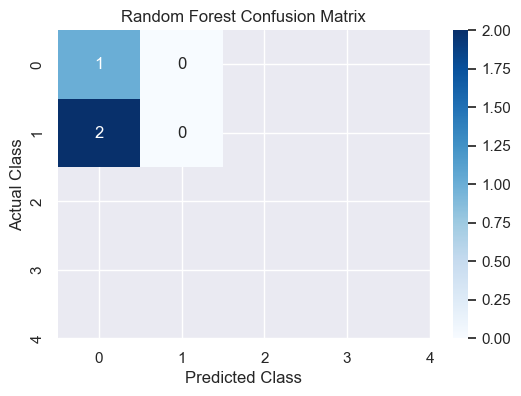

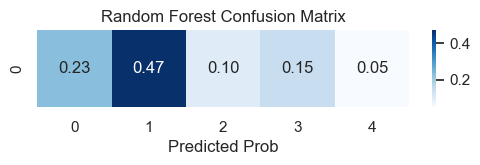

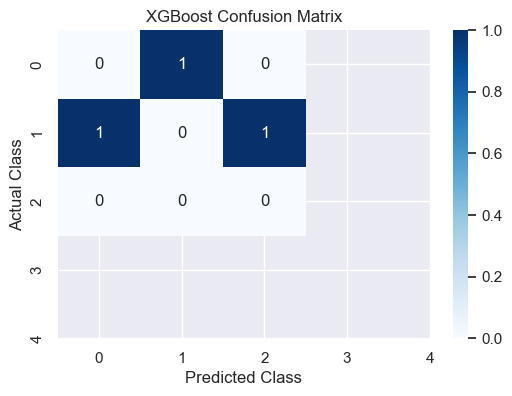

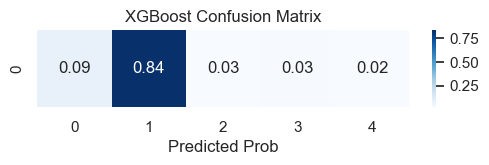

In [54]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Home

In [55]:
target = "GAC"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [56]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

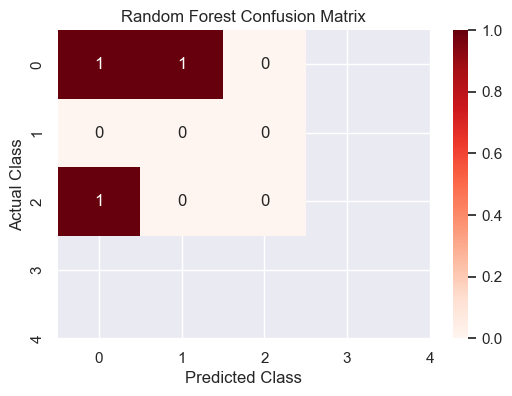

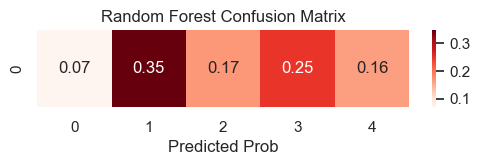

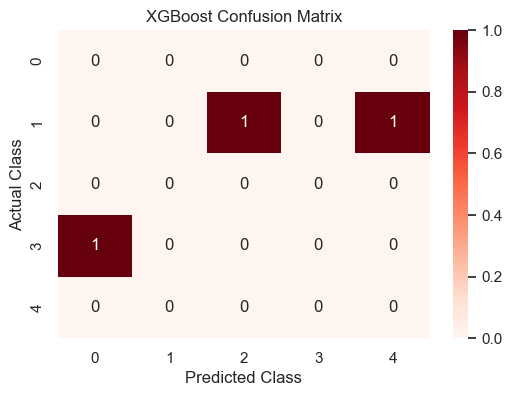

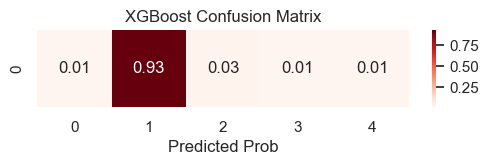

In [58]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model Away

In [59]:
target = "GFC"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [60]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [61]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

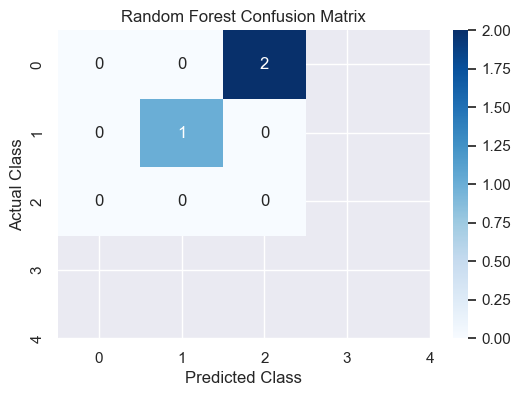

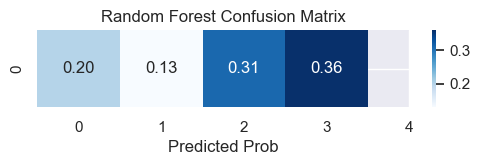

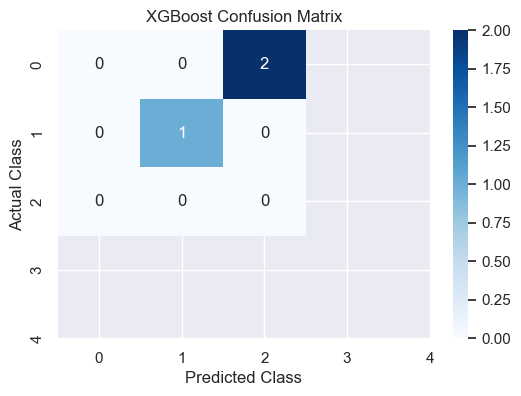

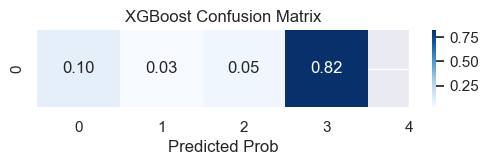

In [62]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Away

In [63]:
target = "GAC"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [64]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

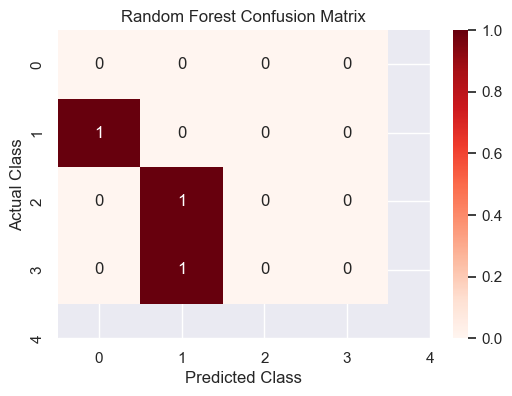

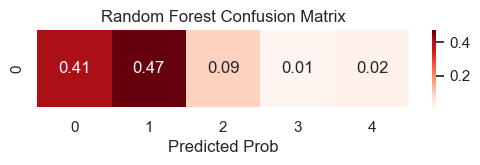

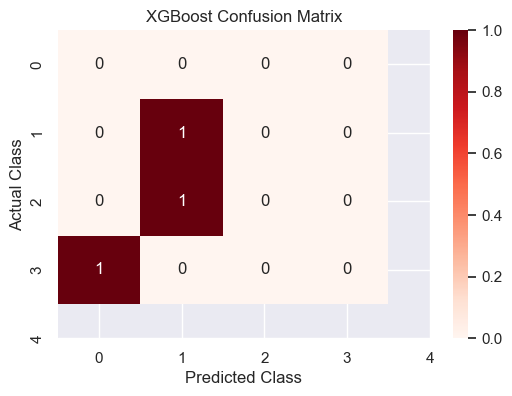

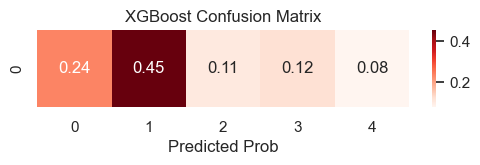

In [66]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

## Regression

### Model Home

In [67]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [68]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [69]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

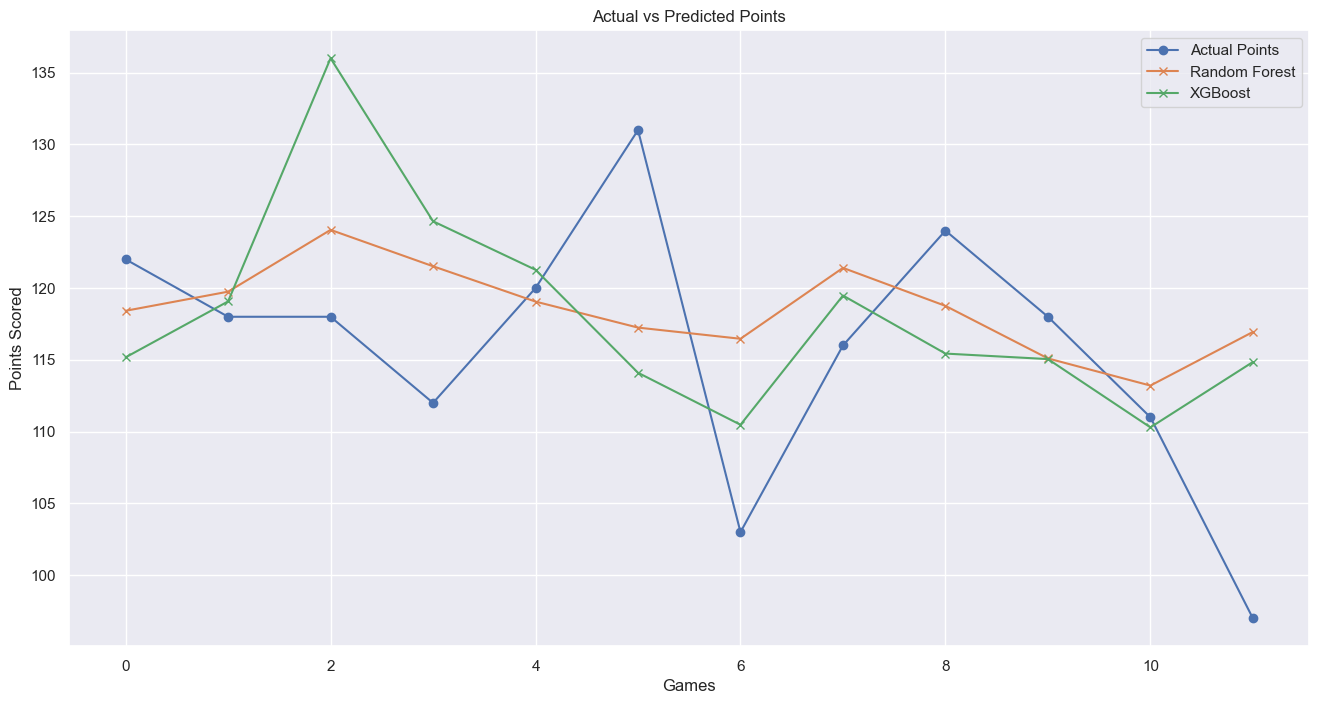

In [85]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

# Split into training and testing sets
train_size = int(len(X) * 0.8)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
# Train and evaluate each model
results = {}
plt.figure(figsize=(16,8))
plt.plot(y_test.values, label='Actual Points', marker='o')
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    plt.plot(y_pred, label=name, marker='x')
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred[0]}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
plt.legend()
plt.title("Actual vs Predicted Points")
plt.xlabel("Games")
plt.ylabel("Points Scored")
plt.show()

In [80]:
results_df

,MAE,RMSE,PRED
Random Forest,7.063876,9.047376,117.443289
XGBoost,8.145854,10.362132,118.500099


### Model vs Home

In [48]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [49]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [50]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 13.425
RMSE: 14.329


In [52]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6818
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 405
[LightGBM] [Info] Start training from score 108.211538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [53]:
results_df

,MAE,RMSE,PRED
Random Forest,13.041667,13.840622,[108.75]
XGBoost,13.151134,15.03493,[113.32865]
LightGBM,16.852781,18.445559,[102.71760442340414]
Linear Regression,24.528301,25.202121,[84.73789959470245]


### Model Away

In [54]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 12.708
RMSE: 14.490


In [59]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 121.941176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
results_df

,MAE,RMSE,PRED
Random Forest,14.915,16.475376,[120.74]
XGBoost,12.521159,13.834184,[121.489395]
LightGBM,13.837515,17.031631,[126.221659266553]
Linear Regression,14.006226,16.370987,[137.60611314295068]


### Model vs Away

In [61]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [62]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [63]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 10.350
RMSE: 11.309


In [65]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6692
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 110.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
results_df

,MAE,RMSE,PRED
Random Forest,11.596667,12.906048,[108.99]
XGBoost,15.120514,16.820382,[102.5551]
LightGBM,9.838286,11.897321,[109.56588285586935]
Linear Regression,14.973625,19.146221,[86.82162740707135]
